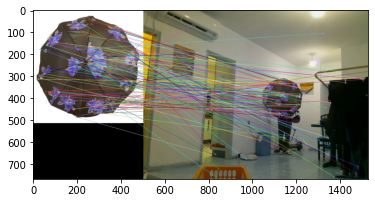

(<matplotlib.image.AxesImage at 0x22580393910>, None)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
img = cv2.imread('../resources/target0.JPG')   # query image
img1 = cv2.imread('../resources/image4.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create(sigma = 3, nOctaveLayers = 20, contrastThreshold = 0.05)
keypoints_1, descriptors_1 = sift.detectAndCompute(gray, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(gray1, None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img, keypoints_1, img1, keypoints_2, matches, img1, flags=2)
plt.imshow(img3),plt.show()

In [3]:
# extracting matches index
matches_query_index = []
matches_train_index = []
for index in np.arange(len(matches)):
    matches_query_index.append(matches[index].queryIdx)
    matches_train_index.append(matches[index].trainIdx)

In [4]:
# extracting X_Y of matches index
x_y_values_query = keypoints_1[0].convert(keypoints_1)
# adding keypoint index
x_y_values_query = np.c_[x_y_values_query,np.arange(len(x_y_values_query))]

matches_x_y_values_query = np.zeros((len(matches_query_index),3), dtype=np.float32)
i = 0
for index in matches_query_index:
    matches_x_y_values_query[i,:] = x_y_values_query[index,:]
    i = i+1
    
x_y_values_train = keypoints_2[0].convert(keypoints_2)
# adding keypoint index
x_y_values_train = np.c_[x_y_values_train,np.arange(len(x_y_values_train))]
matches_x_y_values_train = np.zeros((len(matches_train_index),3), dtype=np.float32)
i = 0
for index in matches_train_index:
    matches_x_y_values_train[i,:] = x_y_values_train[index,:]
    i = i+1

In [5]:
# calculating mean and std
x_mean_query = np.mean(matches_x_y_values_query[:,0])
y_mean_query = np.mean(matches_x_y_values_query[:,1])
x_std_query = np.std(matches_x_y_values_query[:,0])
y_std_query = np.std(matches_x_y_values_query[:,1])

x_mean_train = np.mean(matches_x_y_values_train[:,0])
y_mean_train = np.mean(matches_x_y_values_train[:,1])
x_std_train = np.std(matches_x_y_values_train[:,0])
y_std_train = np.std(matches_x_y_values_train[:,1])

In [6]:
# filtering
filter_array = []
for index in np.arange(len(matches_x_y_values_query)):
    if abs(x_mean_query - matches_x_y_values_query[index, 0]) < x_std_query:
        filter_array.append(True)
    else:
        filter_array.append(False)

filtered_matches_x_y_values_query = matches_x_y_values_query[filter_array]

filter_array = []
for index in np.arange(len(filtered_matches_x_y_values_query)):
    if abs(y_mean_query - filtered_matches_x_y_values_query[index, 1]) < y_std_query:
        filter_array.append(True)
    else:
        filter_array.append(False)

filtered_matches_x_y_values_query = filtered_matches_x_y_values_query[filter_array]

filter_array = []
for index in np.arange(len(matches_x_y_values_train)):
    if abs(x_mean_train - matches_x_y_values_train[index, 0]) < x_std_train:
        filter_array.append(True)
    else:
        filter_array.append(False)

filtered_matches_x_y_values_train = matches_x_y_values_train[filter_array]

filter_array = []
for index in np.arange(len(filtered_matches_x_y_values_train)):
    if abs(y_mean_train - filtered_matches_x_y_values_train[index, 1]) < y_std_train:
        filter_array.append(True)
    else:
        filter_array.append(False)

filtered_matches_x_y_values_train = filtered_matches_x_y_values_train[filter_array]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 2., 2., 1., 1., 0., 0., 1.,
        1., 1., 6., 0., 3., 2., 0., 1., 0., 0., 0., 0., 1., 3., 0., 1., 2.,
        2., 0., 4., 6., 1., 3., 1., 0., 0., 3., 0., 1., 4., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 2., 4., 0., 2., 1., 2., 1., 2., 3., 3., 3., 0.,
        2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([480.80048, 483.50647, 486.21243, 488.91843, 491.62442, 494.33038,
        497.03638, 499.74237, 502.44833, 505.15433, 507.86032, 510.56628,
        513.2723 , 515.9783 , 518.68427, 521.3902 , 524.0962 , 526.8022 ,
        529.5082 , 532.2142 , 534.92017, 537.6261 , 540.3321 , 543.0381 ,
        545.7441 , 548.4501 , 551.15607, 553.862  , 556.568  , 559.274  ,
        561.98   , 564.686  , 567.39197, 570.0979 , 572.8039 , 575.5099 ,
        578.2159 , 580.9219 , 583.62787, 586.3338 , 589.0398 , 591.7458 ,
        594.4518 , 597.1578 , 59

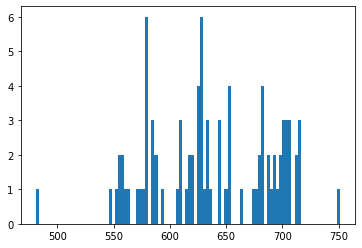

In [7]:
plt.hist(filtered_matches_x_y_values_train[:,0], 100)

In [8]:
filtered_keypoints_index_query = filtered_matches_x_y_values_query[:,2]
filtered_keypoints_index_train = filtered_matches_x_y_values_train[:,2]

In [9]:
# filtering keypoints
filtered_keypoint_query = ()
filtered_keypoint_train = ()

for index in filtered_keypoints_index_query:
    filtered_keypoint_query = filtered_keypoint_query + (keypoints_1[int(index)],)
    
for index in filtered_keypoints_index_train:
    filtered_keypoint_train = filtered_keypoint_train + (keypoints_2[int(index)],)

In [10]:
len(filtered_keypoints_index_train)

88

In [13]:
# filtering descriptors
filtered_descriptors_query = np.zeros((len(filtered_keypoints_index_query),128), dtype=np.float32)
i = 0
for index in filtered_keypoints_index_query:
    filtered_descriptors_query[i,:] = descriptors_1[int(index),:]
    i = i+1
    
filtered_descriptors_train = np.zeros((len(filtered_keypoints_index_train),128), dtype=np.float32)
i = 0
for index in filtered_keypoints_index_train:
    filtered_descriptors_train[i,:] = descriptors_2[int(index),:]
    i = i+1

In [14]:
matches = bf.match(descriptors_1,filtered_descriptors_train)
matches = sorted(matches, key = lambda x:x.distance)

In [15]:
img3 = cv2.drawMatches(img, keypoints_1, img1, filtered_keypoint_train, matches, img1, flags=2)

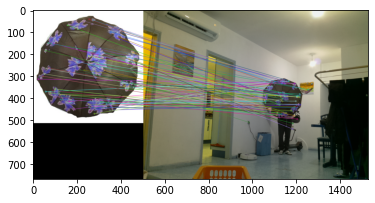

(<matplotlib.image.AxesImage at 0x22580d8bd60>, None)

In [16]:
plt.imshow(img3),plt.show()

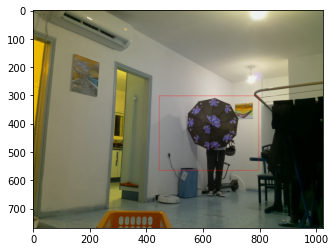

In [32]:
start = (int(x_mean_train-x_std_train), int(y_mean_train-y_std_train))
stop =  (int(x_mean_train+x_std_train), int(y_mean_train+y_std_train))
marked_img = cv2.rectangle(img1, start, stop, color = (255, 0, 0))
plt.imshow(marked_img)
